In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
df = pd.read_csv('ann_1D_LR/mpg.csv')

In [3]:
df.head()

,mpg (n),cylinders (n),displacement (n),horsepower (n),weight (n),acceleration (n),year (n),origin (n),name (s)
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,NaN
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,NaN
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,NaN
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,NaN
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,NaN


In [4]:
x = df['weight (n)'].values.astype('float32')
y = df['mpg (n)'].values.astype('float32')

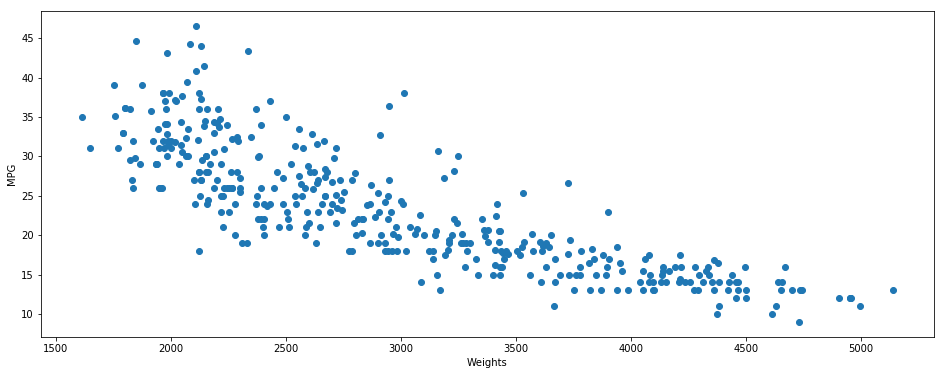

In [5]:
plt.figure(figsize = (16, 6))
plt.scatter(x, y)
plt.xlabel('Weights')
plt.ylabel('MPG')
plt.show()

In [6]:
max_epoch = 100000
learning_rate = 0.001

# creo los tensores de los datos
xtf = tf.placeholder(dtype = tf.float32)
ytf = tf.placeholder(dtype = tf.float32)

# defino el perceptron con una sola capa oculta
# la funcion de activacion va a ser una funcion lineal
def perceptron(xtf, weights, biases):
    '''
    xtf : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # Capa oculta de red neuronal
    layer = weights['l1']*xtf + biases['l1']
    
    # Capa de salida
    output = weights['out']*layer + biases['out']
    
    return output

# defino los pesos como un diccionario
weights = {'l1': tf.Variable(np.random.randn(1), dtype = tf.float32),
           'out': tf.Variable(np.random.randn(1), dtype = tf.float32)}

# defino los biases como un diccionario
biases = {'l1': tf.Variable(np.random.randn(1), dtype = tf.float32),
           'out': tf.Variable(np.random.randn(1), dtype = tf.float32)}

# llamo la variable que evalua el perceptron
linear_model = perceptron(xtf, weights, biases)

# loss function
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

# optimizador
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train = optimizer.minimize(loss = loss)

# Creo que la session de tf
sess = tf.Session()

# inicializo las variables de tf
init = tf.global_variables_initializer()

sess.run(init)

for epoch in range(max_epoch):
    sess.run([train, loss], feed_dict = {xtf: x, ytf: y})
    
wopt, bopt, loss_f = sess.run([weights, biases, loss], feed_dict = {xtf: x, ytf: y})

print(wopt)
print("\n")
print(bopt)
print("\n")
print(loss_f)

{'l1': array([ 0.00286537], dtype=float32), 'out': array([-2.60278344], dtype=float32)}


{'l1': array([-13.63595581], dtype=float32), 'out': array([ 10.66716671], dtype=float32)}


7431.73


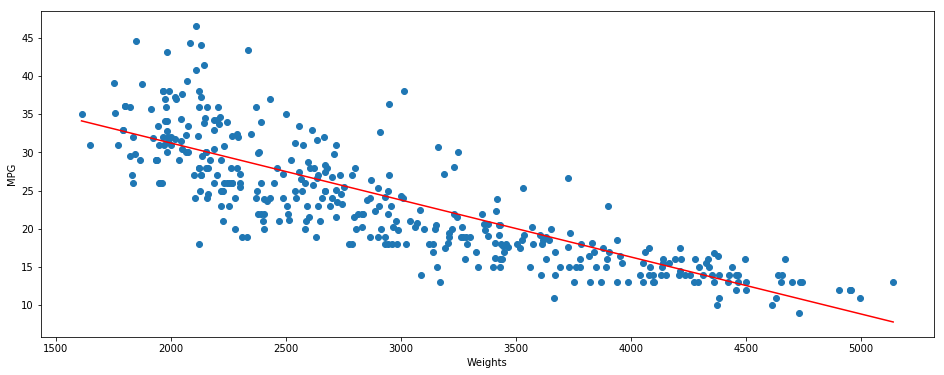

In [7]:
x_test = np.linspace(x.min(), x.max(), 100)

y_test = perceptron(xtf = x_test, weights = wopt, biases = bopt)

plt.figure(figsize = (16, 6))
plt.scatter(x, y)
plt.plot(x_test, y_test, '-', color = 'red')
plt.xlabel('Weights')
plt.ylabel('MPG')
plt.show()

In [8]:
from tensorflow.contrib.learn import LinearRegressor

In [10]:
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]
LR = LinearRegressor(feature_columns = feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3695ab8240>, '_evaluation_master': '', '_num_worker_replicas': 0, '_tf_random_seed': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_environment': 'local', '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_master': '', '_task_id': 0, '_model_dir': '/tmp/tmpvfv1o3x1', '_task_type': None, '_is_chief': True, '_session_config': None}


In [12]:
LR.fit(x = x, y = y, max_steps = max_epoch)

INFO:tensorflow:Skipping training since max_steps has already saved.


LinearRegressor(params={'gradient_clip_norm': None, 'optimizer': None, 'feature_columns': [_RealValuedColumn(column_name='', dimension=1, default_value=None, dtype=tf.float32, normalizer=None)], 'joint_weights': False, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f3695ab8198>})

In [18]:
y_test2 = LR.predict(x_test)

INFO:tensorflow:Restoring parameters from /tmp/tmpvfv1o3x1/model.ckpt-487420


In [20]:
y_test2 = list(y_test2)

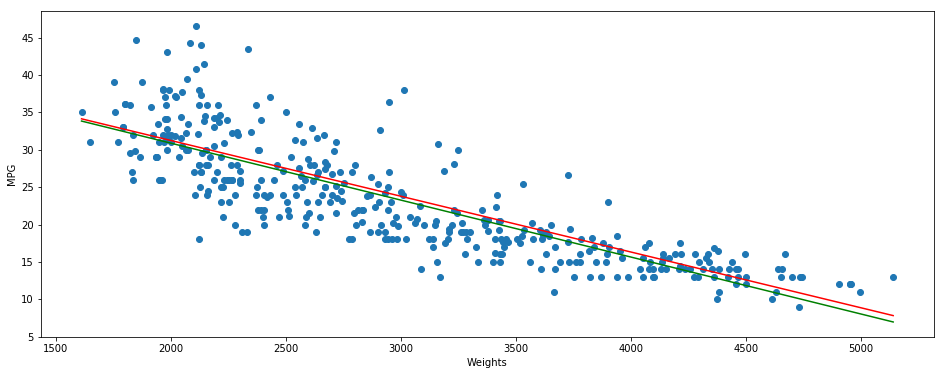

In [22]:
plt.figure(figsize = (16, 6))
plt.scatter(x, y)
plt.plot(x_test, y_test, '-', color = 'red')
plt.plot(x_test, y_test2, '-', color = 'green')
plt.xlabel('Weights')
plt.ylabel('MPG')
plt.show()